#### Importing the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline

#### Importing the data

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')

#### Scatterplot matrix of the entire data gives us a thorough understanding of the data, its not always possible to draw a scatterplot matrix to fully explore the data, in such situations it is good to plot only for a few features first, just to explore

E:\Python\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\Python\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Python\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
E:\Python\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


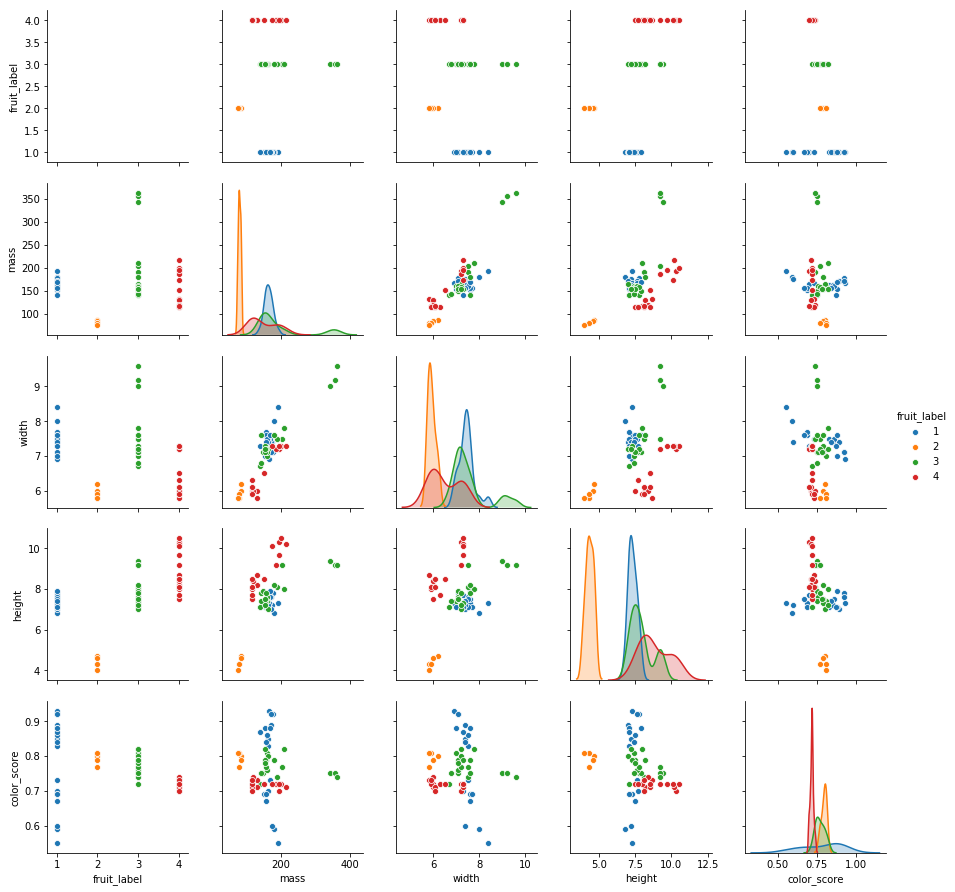

In [3]:
sns.pairplot(fruits,hue='fruit_label')

In [13]:
fruits.head()
fruits_labs=dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
fruits.dtypes
fruits_wthot_txt=fruits.drop(['fruit_name','fruit_subtype'],axis=1)
fruits_wthot_txt.head()
x=fruits_wthot_txt[['mass','width','height','color_score']]
y=fruits_wthot_txt['fruit_label']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.2,random_state=0,stratify=y)

In [15]:
# scaler=MinMaxScaler(copy=True)
# x_train_scaled=scaler.fit_transform(x_train)
# x_test_scaled=scaler.fit_transform(x_test)

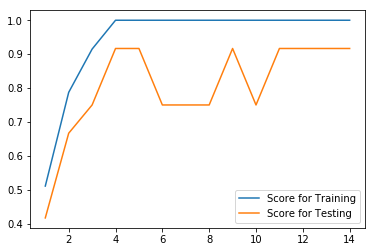

In [16]:
gini_results=pd.DataFrame(columns = ['Depth','Score for Training','Score for Testing'])
for treeDepth in range(1,15):
    ds=DecisionTreeClassifier(max_depth=treeDepth,criterion='gini')
    m1=ds.fit(x_train,y_train)
    predicted=m1.predict(x_test)
    train_score=m1.score(x_train,y_train)
    test_score=m1.score(x_test,y_test)
#     confusion_matrix(y_test, predicted)
    gini_results.loc[treeDepth]=[treeDepth,train_score,test_score]    
gini_results.head(15)
gini_results.pop('Depth')
gini_results.plot()

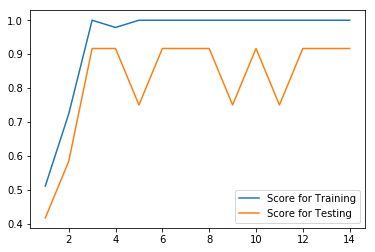

In [36]:
entropy_results=pd.DataFrame(columns = ['Depth','Score for Training','Score for Testing'])
for treeDepth in range(1,15):
    ds=DecisionTreeClassifier(max_depth=treeDepth,criterion='entropy')
    m1=ds.fit(x_train,y_train)
    predicted=m1.predict(x_test)
    train_score=m1.score(x_train,y_train)
    test_score=m1.score(x_test,y_test)
#     confusion_matrix(y_test, predicted)
    entropy_results.loc[treeDepth]=[treeDepth,train_score,test_score]
    
entropy_results.head(15)
entropy_results.pop('Depth')
entropy_results.plot()

#### According to both the evaluation graphs, we see the best accuracy at tree depth of 4 for Entropy Decision Tree

In [39]:
final_model_str= DecisionTreeClassifier(max_depth=4,criterion='entropy')
final_model=final_model_str.fit(x_train,y_train)

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import Image
from graphviz import Source
from IPython.display import display
from sklearn.externals.six import StringIO  
import pydotplus

In [55]:
from collections import Counter
Counter(fruits['fruit_name'])

Counter({'apple': 19, 'mandarin': 5, 'orange': 19, 'lemon': 16})

In [48]:
# labels=fruits.columns[2:-1]
class_nam=fruits.fruit_name.unique()
print(class_names)

['apple' 'mandarin' 'orange' 'lemon']


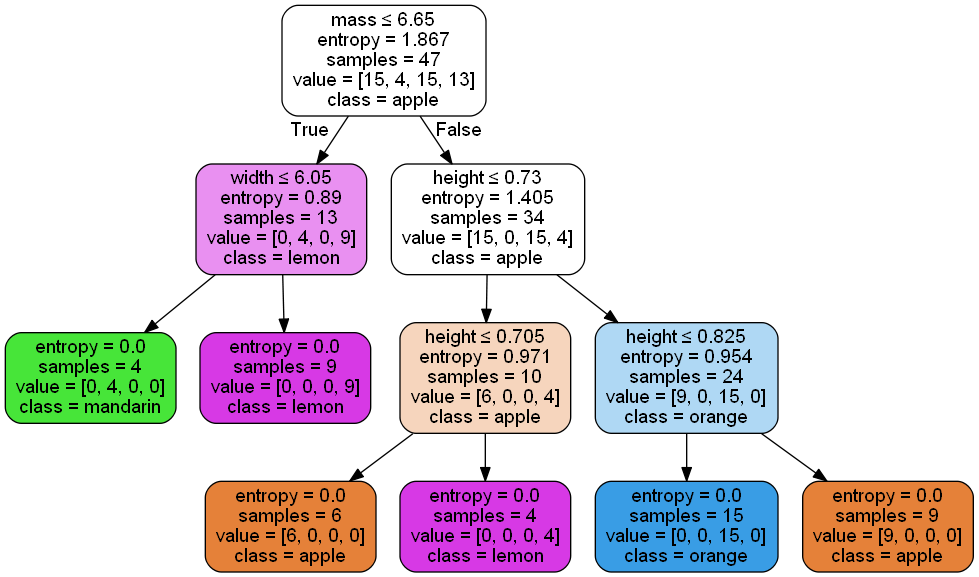

In [53]:
dot_data = StringIO()
export_graphviz(final_model, out_file=dot_data,  
                filled=True, rounded=True,feature_names=labels, class_names=class_nam,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())